## EXPLORING DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#impoerting csv file and studying the collected data for analysis
data=pd.read_csv('50_Startups.csv')
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [3]:
#import statsmodels.graphics.regressionplots import influence_plot
#import statmsodels.formula.api as smf
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
data.shape

(50, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [7]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## EDA PHASE

In [8]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
#correlation between profit and R&D spend is in range(0.9729)

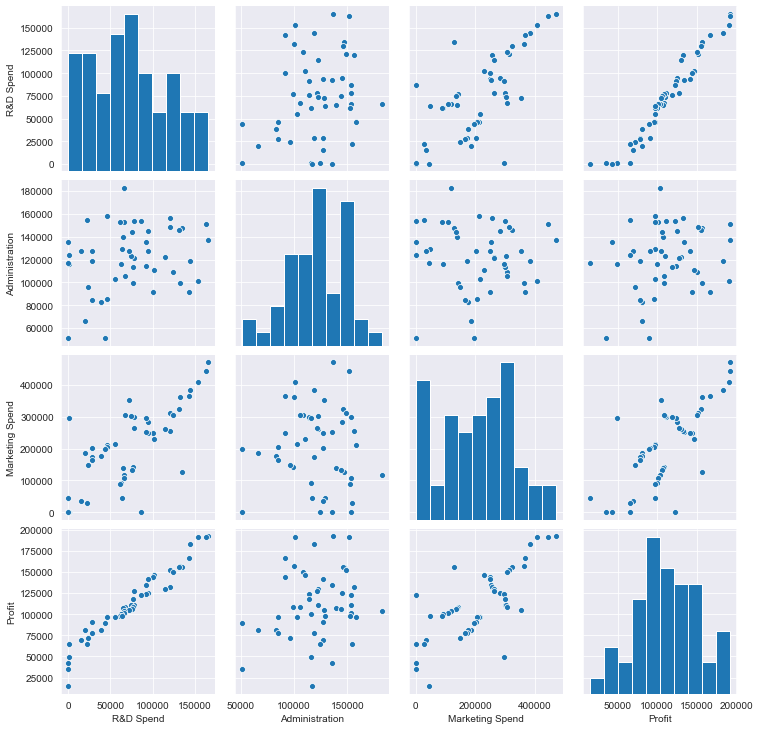

In [10]:
#scatterplot between variables along with histogram
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [11]:
#pd.crosstab(data.Profit,data.Administration).plot(kind="bar")

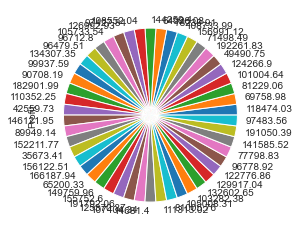

In [12]:
data["Profit"].value_counts()
data.Profit.value_counts().plot(kind="pie")

(array([ 1.,  3.,  2.,  6., 10.,  8.,  7.,  7.,  2.,  4.]),
 array([ 14681.4  ,  32439.443,  50197.486,  67955.529,  85713.572,
        103471.615, 121229.658, 138987.701, 156745.744, 174503.787,
        192261.83 ]),
 <a list of 10 Patch objects>)

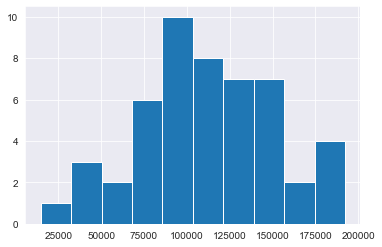

In [13]:
plt.hist(data['Profit'])

In [14]:
data=data.rename(columns={"R&D Spend":"rdspend","Marketing Spend":"marketing","Administration":"admin"})

In [15]:
data.head()

,rdspend,admin,marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


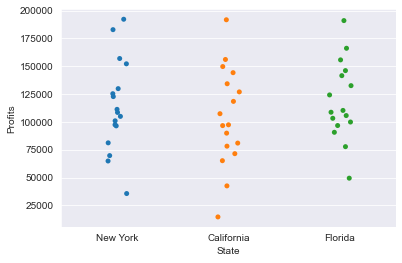

In [16]:
sns.stripplot(x='State', y='Profit', data=data)
plt.ylabel('Profits')
plt.show()

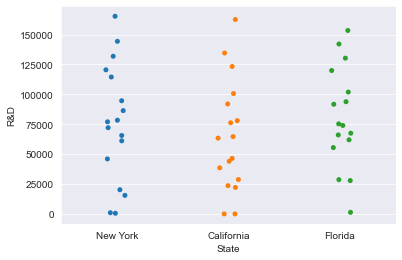

In [17]:
sns.stripplot(x='State', y='rdspend', data=data)
plt.ylabel('R&D')
plt.show()

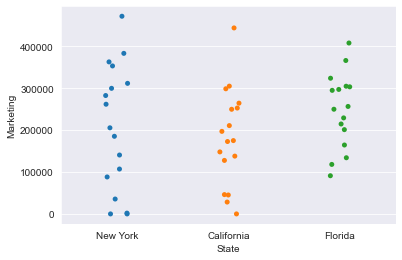

In [18]:
sns.stripplot(x='State', y='marketing', data=data)
plt.ylabel('Marketing')
plt.show()

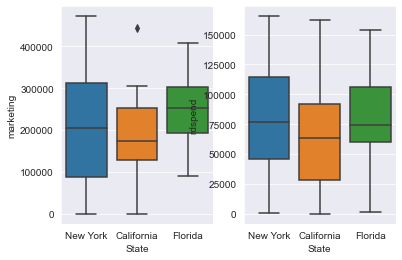

In [19]:
plt.subplot(1,2,1)
sns.boxplot(x='State', y='marketing', data=data)
plt.subplot(1,2,2)
sns.boxplot(x='State', y='rdspend', data=data)


In [20]:
data.corr()

,rdspend,admin,marketing,Profit
rdspend,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## MODEL BULDING PHASE
preparing the model for the 50 startups

In [21]:
import statsmodels.formula.api as smf
model=smf.ols('Profit~rdspend+admin+marketing',data=data).fit()

In [22]:
model.params

Intercept    50122.192990
rdspend          0.805715
admin           -0.026816
marketing        0.027228
dtype: float64

In [23]:
model.pvalues
#here Marketing spend > 0.05 and Administration > 0.05 which aren't significant

Intercept    1.057379e-09
rdspend      2.634968e-22
admin        6.017551e-01
marketing    1.047168e-01
dtype: float64

In [24]:
model.rsquared

0.9507459940683246

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           4.53e-30
Time:                        23:57:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rdspend        0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### in the summary it is seen that the model Rsquared value is 0.951 but the p-value for admin and marketing are not significant

In [26]:
#Checking SLR of Profit based on Marketing Spend only
model_marketing=smf.ols('Profit~marketing',data=data).fit()

In [27]:
model_marketing.pvalues

Intercept    4.294735e-10
marketing    4.381073e-10
dtype: float64

In [28]:
model_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           4.38e-10
Time:                        23:38:47   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### It is seen that the p<0.05 and is significant but not much effective on R squared value(0.559)

In [30]:
#Checking SLR of Profit based on Administration only
model_administration=smf.ols('Profit~admin',data=data).fit()

In [31]:
model_administration.pvalues

Intercept    0.003824
admin        0.162217
dtype: float64

In [32]:
model_administration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 11 Feb 2021   Prob (F-statistic):              0.162
Time:                        23:38:48   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### p>0.05 which is not significant and so the R squared value(0.04) in case of Administration. It is seen that the contribution of the independent variable on the PROFIT is very negligibile so lets takeout the administration 

In [88]:
model_combined=smf.ols('Profit~rdspend+marketing',data=data).fit()

In [89]:
model_combined.pvalues

Intercept    3.504062e-22
rdspend      6.040433e-24
marketing    6.003040e-02
dtype: float64

In [90]:
model_combined.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           2.16e-31
Time:                        00:16:26   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
rdspend        0.7966      0.041     19.266      0.000       0.713       0.880
marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R Squared value is 0.95

In [91]:
#It is clearly seen that there is issue in the Aministration.
#Let's check for multi-collinearity using Variation Inflation Factor(VIF)

## MODEL VALIDATION PHASE.

In [37]:
rsq_admin=smf.ols('admin~marketing+rdspend',data=data).fit().rsquared
vif_admin=1/(1-rsq_admin)

In [38]:
rsq_marketing=smf.ols('marketing~admin+rdspend',data=data).fit().rsquared
vif_marketing=1/(1-rsq_marketing)

In [39]:
rsq_rdspend=smf.ols('rdspend~marketing+admin',data=data).fit().rsquared
vif_rdspend=1/(1-rsq_rdspend)

In [40]:
# Storing vif values in a data frame
df={'Variable':['R&D spend','Marketing','Administration'],'VIF':[vif_rdspend,vif_marketing,vif_admin]}
DF_vif=pd.DataFrame(df)
DF_vif

,Variable,VIF
0,R&D spend,2.468903
1,Marketing,2.326773
2,Administration,1.175091


In [41]:
#it is found that there is no multi collinearity problem involved here.

## Residual Analysis

### 1. Fitted Vs Residuals for Homoscedasticity

In [42]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

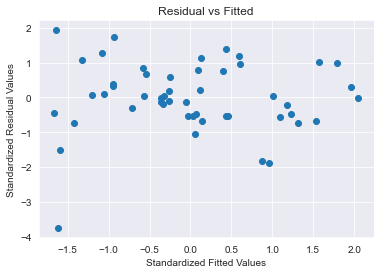

In [43]:
plt.title('Residual vs Fitted'),plt.xlabel('Standardized Fitted Values'),plt.ylabel('Standardized Residual Values')
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

### 2. Test for Normality(Q-Q Plot)

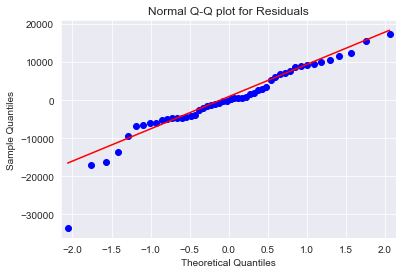

In [44]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot for Residuals')
plt.show()

In [45]:
list(np.where(model.resid>0))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int32)]

### 3. Residual Vs Regressors(Predictors)

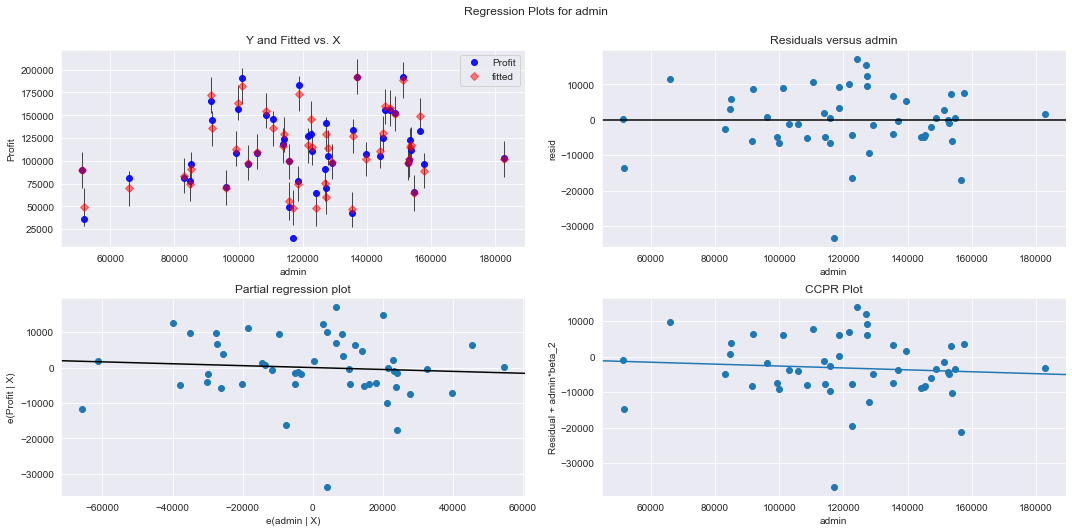

In [46]:
#Exogenous variables are used i.e values from inside
rvsp=plt.figure(figsize=(15,7.5))
rvsp=sm.graphics.plot_regress_exog(model,'admin',fig=rvsp)
plt.show()

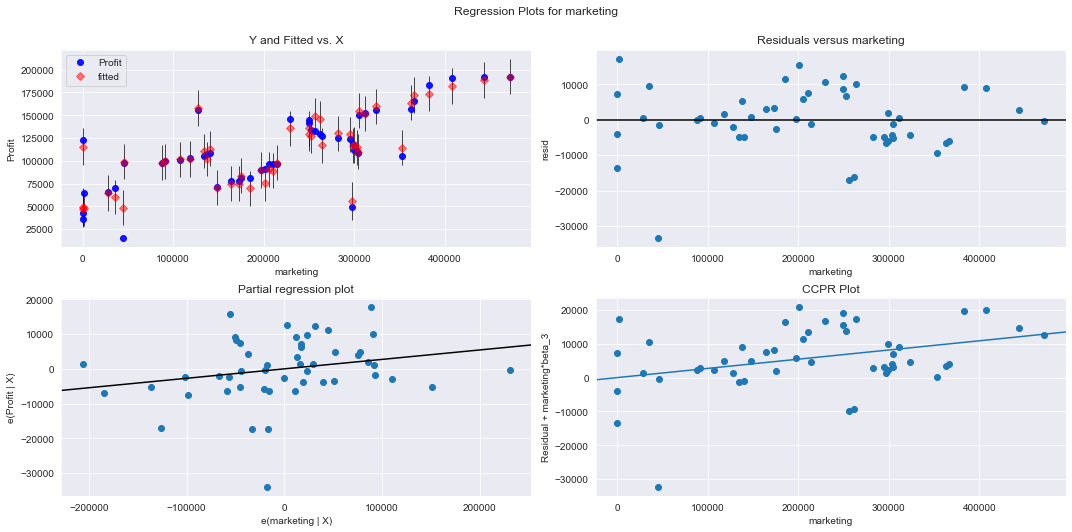

In [47]:
rvsp=plt.figure(figsize=(15,7.5))
rvsp=sm.graphics.plot_regress_exog(model,'marketing',fig=rvsp)
plt.show()

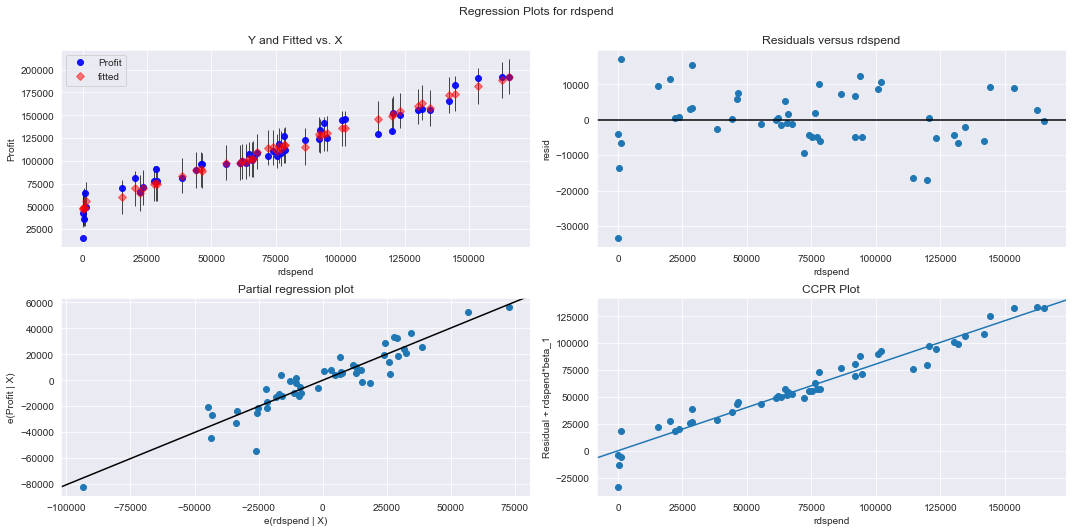

In [48]:
rvsp=plt.figure(figsize=(15,7.5))
rvsp=sm.graphics.plot_regress_exog(model,'rdspend',fig=rvsp)
plt.show()

## Model Deletion Diagnostics
 Detecting Outliers or Influencers to minimise Error Criteria

### 1. Cook's Distance

In [49]:
outliers=model.get_influence()
(c,p)=outliers.cooks_distance

<ipython-input-50-2257c94fab32>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data)),np.round(c,3))


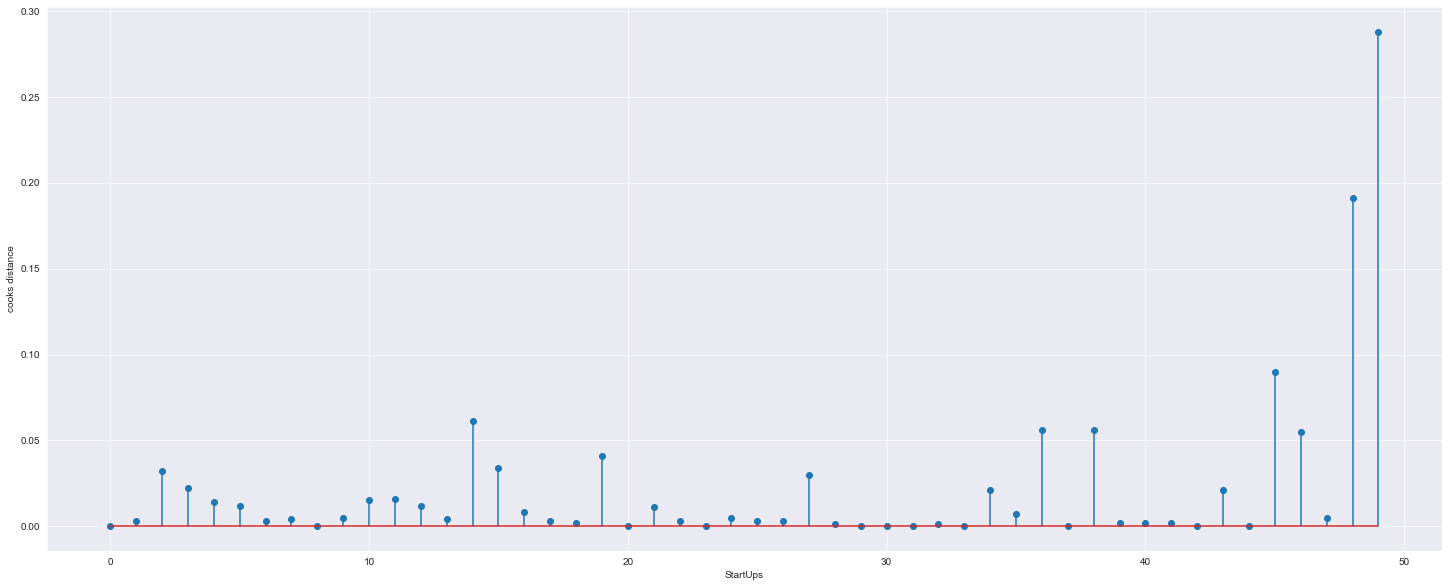

In [50]:
#Finding the influencers using stem plot
fig=plt.subplots(figsize=(25,10))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('StartUps')
plt.ylabel('cooks distance')
plt.show()

In [51]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543258)

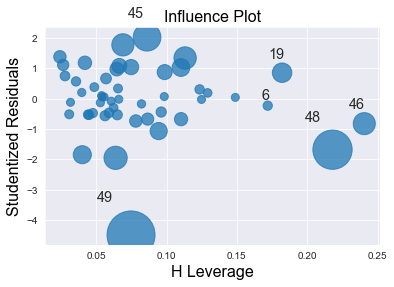

In [52]:
from statsmodels.graphics.regressionplots import influence_plot
#fig=plt.subplots(figsize=(25,10))
fig=influence_plot(model)
plt.show()

In [53]:
#checking the leverage cutoff 
x=data.shape[1]
y=data.shape[0]
leverage_cutoff=3*((x+1/y))
leverage_cutoff

15.059999999999999

In [54]:
data[data.index.isin([46,47,48,49])]

,rdspend,admin,marketing,State,Profit
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [100]:
data1=data.drop(data.index[[49]],axis=0).reset_index()
#data1

In [101]:
#data1=data1.drop(['index'],axis=1)
data1.tail()

,index,rdspend,admin,marketing,State,Profit
44,44,22177.74,154806.14,28334.72,California,65200.33
45,45,1000.23,124153.04,1903.93,New York,64926.08
46,46,1315.46,115816.21,297114.46,Florida,49490.75
47,47,0.00,135426.92,0.00,California,42559.73
48,48,542.05,51743.15,0.00,New York,35673.41


In [102]:
rebuild1=smf.ols('Profit~rdspend+marketing',data=data1).fit()
(rebuild1.rsquared,rebuild1.aic,rebuild1.pvalues)

(0.9610856807456628,
 1018.8564801588338,
 Intercept    1.970460e-25
 rdspend      3.628510e-26
 marketing    4.084443e-02
 dtype: float64)

In [103]:
rebuild1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           3.74e-33
Time:                        00:19:52   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
rdspend        0.7754      0.035     22.136      0.000       0.705       0.846
marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### There is drastic change in the model as the 49th row is deleted. Rsquared value is 0.961, AIC=1019, P-Value is significant. lets see if we can reduce the AIC value